# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.


Bad key axes.color_cycle in file /Users/mohamedabdelbary/.matplotlib/matplotlibrc, line 240 ('axes.color_cycle    : 348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2  # color cycle for plot lines')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution


Number of faces detected: 1


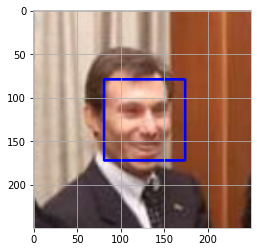

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_human_detected = sum(int(face_detector(i)) for i in human_files_short)
dog_files_human_detected = sum(int(face_detector(i)) for i in dog_files_short)

print(f"Haar cascade filter detected that a human face exists in {human_files_human_detected} human images, amounting to {100 * human_files_human_detected / len(human_files_short)}% of human images")
print(f"Haar cascade filter detected that a human face exists in {dog_files_human_detected} dog images, amounting to {100 * dog_files_human_detected / len(dog_files_short)}% of dog images")

Haar cascade filter detected that a human face exists in 99 human images, amounting to 99.0% of human images
Haar cascade filter detected that a human face exists in 18 dog images, amounting to 18.0% of dog images


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [324]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

t = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = cv2.imread(img_path)
    img = t(img).float()
    img = img.unsqueeze(0)
    preds = VGG16.forward(img).flatten()
    
    return max(enumerate(preds), key=lambda x: x[1])[0] # predicted class index

pred_class_idx = VGG16_predict("dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg")
print(pred_class_idx)

252


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [317]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred_class_idx = VGG16_predict(img_path)
    return 151 <= pred_class_idx <= 268 # true/false

print(dog_detector("dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg"))
print(dog_detector("lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg"))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [325]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_dog_detected_vgg = sum(int(dog_detector(i)) for i in human_files_short)
dog_files_dog_detected_vgg = sum(int(dog_detector(i)) for i in dog_files_short)
print(f"Pre-trained VGG network detected presence of dog in {human_files_dog_detected_vgg} sample human images, amounting to {100 * human_files_dog_detected_vgg / len(human_files_short)}%")
print(f"Pre-trained VGG network detected presence of dog in {dog_files_dog_detected_vgg} sample dog images, amounting to {100 * dog_files_dog_detected_vgg / len(dog_files_short)}%")

Pre-trained VGG network detected presence of dog in 0 sample human images, amounting to 0.0%
Pre-trained VGG network detected presence of dog in 91 sample dog images, amounting to 91.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [156]:
import os
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# how many samples per batch to load
batch_size = 20

# Allow for random flips and random rotations in training
train_valid_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Just tensor and transform normalization for validation and test sets
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# choose the training and test datasets
train_data = datasets.ImageFolder('dogImages/train', transform=train_valid_transform)
valid_data = datasets.ImageFolder('dogImages/valid', transform=train_valid_transform)
test_data = datasets.ImageFolder('dogImages/test', transform=test_transform)

num_train = len(train_data)
train_indices = list(range(num_train))
num_valid = len(valid_data)
valid_indices = list(range(num_valid))
np.random.shuffle(train_indices)
np.random.shuffle(valid_indices)

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(valid_indices)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [157]:
print(num_train)
print(num_valid)
from collections import Counter

"""
DataLoader assigns folder indexes in the order they are listed. The mapping below has been double checked by checking
the counts of the different classes and comparing with the output of running the following bash command

for x in $(ls dogImages/train);
do;
    echo $(echo $x | cut -d'.' -f2),$(ls dogImages/train/${x} | wc -l);
done;

This dictionary will be handy for mapping back from the prediction indexes to the name of the class.
"""
CLASS_MAP = {
    0: "Affenpinscher",
    1: "Afghan_hound",
    2: "Airedale_terrier",
    3: "Akita",
    4: "Alaskan_malamute",
    5: "American_eskimo_dog",
    6: "American_foxhound",
    7: "American_staffordshire_terrier",
    8: "American_water_spaniel",
    9: "Anatolian_shepherd_dog",
    10: "Australian_cattle_dog",
    11: "Australian_shepherd",
    12: "Australian_terrier",
    13: "Basenji",
    14: "Basset_hound",
    15: "Beagle",
    16: "Bearded_collie",
    17: "Beauceron",
    18: "Bedlington_terrier",
    19: "Belgian_malinois",
    20: "Belgian_sheepdog",
    21: "Belgian_tervuren",
    22: "Bernese_mountain_dog",
    23: "Bichon_frise",
    24: "Black_and_tan_coonhound",
    25: "Black_russian_terrier",
    26: "Bloodhound",
    27: "Bluetick_coonhound",
    28: "Border_collie",
    29: "Border_terrier",
    30: "Borzoi",
    31: "Boston_terrier",
    32: "Bouvier_des_flandres",
    33: "Boxer",
    34: "Boykin_spaniel",
    35: "Briard",
    36: "Brittany",
    37: "Brussels_griffon",
    38: "Bull_terrier",
    39: "Bulldog",
    40: "Bullmastiff",
    41: "Cairn_terrier",
    42: "Canaan_dog",
    43: "Cane_corso",
    44: "Cardigan_welsh_corgi",
    45: "Cavalier_king_charles_spaniel",
    46: "Chesapeake_bay_retriever",
    47: "Chihuahua",
    48: "Chinese_crested",
    49: "Chinese_shar-pei",
    50: "Chow_chow",
    51: "Clumber_spaniel",
    52: "Cocker_spaniel",
    53: "Collie",
    54: "Curly-coated_retriever",
    55: "Dachshund",
    56: "Dalmatian",
    57: "Dandie_dinmont_terrier",
    58: "Doberman_pinscher",
    59: "Dogue_de_bordeaux",
    60: "English_cocker_spaniel",
    61: "English_setter",
    62: "English_springer_spaniel",
    63: "English_toy_spaniel",
    64: "Entlebucher_mountain_dog",
    65: "Field_spaniel",
    66: "Finnish_spitz",
    67: "Flat-coated_retriever",
    68: "French_bulldog",
    69: "German_pinscher",
    70: "German_shepherd_dog",
    71: "German_shorthaired_pointer",
    72: "German_wirehaired_pointer",
    73: "Giant_schnauzer",
    74: "Glen_of_imaal_terrier",
    75: "Golden_retriever",
    76: "Gordon_setter",
    77: "Great_dane",
    78: "Great_pyrenees",
    79: "Greater_swiss_mountain_dog",
    80: "Greyhound",
    81: "Havanese",
    82: "Ibizan_hound",
    83: "Icelandic_sheepdog",
    84: "Irish_red_and_white_setter",
    85: "Irish_setter",
    86: "Irish_terrier",
    87: "Irish_water_spaniel",
    88: "Irish_wolfhound",
    89: "Italian_greyhound",
    90: "Japanese_chin",
    91: "Keeshond",
    92: "Kerry_blue_terrier",
    93: "Komondor",
    94: "Kuvasz",
    95: "Labrador_retriever",
    96: "Lakeland_terrier",
    97: "Leonberger",
    98: "Lhasa_apso",
    99: "Lowchen",
    100: "Maltese",
    101: "Manchester_terrier",
    102: "Mastiff",
    103: "Miniature_schnauzer",
    104: "Neapolitan_mastiff",
    105: "Newfoundland",
    106: "Norfolk_terrier",
    107: "Norwegian_buhund",
    108: "Norwegian_elkhound",
    109: "Norwegian_lundehund",
    110: "Norwich_terrier",
    111: "Nova_scotia_duck_tolling_retriever",
    112: "Old_english_sheepdog",
    113: "Otterhound",
    114: "Papillon",
    115: "Parson_russell_terrier",
    116: "Pekingese",
    117: "Pembroke_welsh_corgi",
    118: "Petit_basset_griffon_vendeen",
    119: "Pharaoh_hound",
    120: "Plott",
    121: "Pointer",
    122: "Pomeranian",
    123: "Poodle",
    124: "Portuguese_water_dog",
    125: "Saint_bernard",
    126: "Silky_terrier",
    127: "Smooth_fox_terrier",
    128: "Tibetan_mastiff",
    129: "Welsh_springer_spaniel",
    130: "Wirehaired_pointing_griffon",
    131: "Xoloitzcuintli",
    132: "Yorkshire_terrier",
}

6680
835


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I used the following pre-processing procedure

- Using a batch size of 20 to avoid batches that are too large and could take long to train
- For the train and validation datasets, I used the following pre-processing
    - Random horizontal flip and random rotation by 10 degrees transformations to build some robustness in the     training process.
    - Those transforms are then followed by a resizing operation to 224 pixels, which seems to be close to the size of the original image so won't remove a lot of relevant detail, and will also allow us to use VGG 16 later.
    - Then a conversion to a tensor object followed by a normalisation with means (0.485, 0.456, 0.406) and standard deviations (0.229, 0.224, 0.225) for the 3 channels, as these are settings that seem to produce good results. Normalisation with mean and std of 0.5 across the 3 channels was tried out first, but this setting seemed to produce slightly better results.
- For the test set, the same process is applied with the exception of the random flip and rotation, as we want to test on the images as they are.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [326]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Results in 16 feature maps of 224*224 
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(16)
        # Assuming max pooling on the previous layer, we get as input 16 feature maps of 112*112
        self.conv2 = nn.Conv2d(16, 128, 3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(128)
        # Assuming max pooling on the previous layer, we get as input 128 feature maps of 56*56
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)
        # Assuming max pooling on previous layer, we get as input 64 feature maps of 28*28
        self.conv4 = nn.Conv2d(64, 32, 3, padding=1)
        self.conv4_bn = nn.BatchNorm2d(32)
        # Assuming max pooling on previous layer, we get as input 32 feature maps of 14*14
        self.conv5 = nn.Conv2d(32, 16, 3, padding=1)
        self.conv5_bn = nn.BatchNorm2d(16)
        self.conv6 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(16)
        # Assuming max pooling on conv 6 but not conv5, we get as input 16 feature maps of 7*7
        self.fc1 = nn.Linear(16 * 7 * 7, 2000)
        self.fc1_bn = nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 500)
        self.fc2_bn = nn.BatchNorm1d(500)
        self.fc3 = nn.Linear(500, len(CLASS_MAP))
        # Max pooling layer with kernel of size 3 and stride of 2
        self.pool = nn.MaxPool2d(3, 2, padding=1)
        # Flattening layer ahead of fully-connected layers
        self.flat = nn.Flatten()
        # Dropout with 20% probability to counter overfitting
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.elu(self.conv1_bn(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(F.elu(self.conv2_bn(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(F.elu(self.conv3_bn(self.conv3(x))))
        x = self.dropout(x)
        x = self.pool(F.elu(self.conv4_bn(self.conv4(x))))
        x = self.dropout(x)
        x = F.elu(self.conv5_bn(self.conv5(x)))
        x = self.dropout(x)
        x = self.pool(F.elu(self.conv6_bn(self.conv6(x))))
        x = self.dropout(x)
        x = self.flat(x)
        x = F.elu(self.fc1_bn(self.fc1(x)))
        x = self.dropout(x)
        x = F.elu(self.fc2_bn(self.fc2(x)))
        x = self.dropout(x)
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Given the nature of the problem and that the classification task is relatively complex, I thought I'd start with at least 3 convolutional layers followed by 2 fully-connected layers. The architecture I started with was the following

- Conv Layer 1: Takes as input 3 channels of 224 x 224 pixel images and produces 16 feature maps using a 3 x 3 kernel with a padding of 1 to preserve size. These are followed by a max pooling layer of kernel size 2 and stride of 2 resulting in output feature maps of 112 x 112 in size.
- Conv Layer 2: Takes as input the 16 feature maps of size 112 x 112 from Conv Layer 1 and applies the same sequence of operations, thus producing 64 feature maps of size 56 x 56.
- Conv Layer 3: Takes as input the 64 feature maps of size 56 x 56 from Conv Layer 2 and reduces the dimensionality ahead of the flattening operation into 32 feature maps of size 28 x 28.
- Flatten layer: Layer that flattens all 32 feature maps into a 32 x 28 x 28 length vector.
- Fully connected layer 1: Takes as inputs a 25,088 length vector (32 x 28 x 28) and produces 1000 length vector, as a pen-ultimate stage
- Fully connected layer 2: The final hidden layer which takes as input a 1000 length vector and produces a vector of log liklihoods the size of which is 133 (same as the size of the dog breed classes).
- All hidden layers use a ReLU activation function, while the final layer uses a log softmax function. Dropout with a probability of 0.2 is used after each max pooling step as well as after the first fully connected layer.

While this seemed like a good configuration to start with, it wasn't sufficient to reach the desired accuracy. Validation loss stops dropping after about 12 epochs and I couldn't get the accuracy of the model above 7% with this configuration. Thus the next step was to add another convolutional layer (conv4) but that wasn't sufficient either.

After a few trials with different architectures I settled on a final architecture that achieves 11% accuracy over 50 epochs

- Conv Layer 1: Takes as input 3 channels of 224 x 224 pixel images and produces 16 feature maps using a 3 x 3 kernel with a padding of 1 to preserve size. These are followed by a max pooling layer of kernel size 3, stride of 2 and padding of 1 resulting in output feature maps of 112 x 112 in size.
- Conv Layer 2: Takes as input the 16 feature maps of size 112 x 112 from Conv Layer 1 and applies the same sequence of operations, producing 128 feature maps of size 56 x 56.
- Conv Layer 3: Takes as input the 128 feature maps of size 56 x 56 from Conv Layer 2 and produces 64 feature maps of size 28 x 28.
- Conv Layer 4: Takes as input the 64 feature maps of size 28 x 28 and produces 32 feature maps of size 14 x 14
- Conv Layer 5: This is the only layer that doesn't perform max pooling, and that's because I wanted more depth in the convolutional layer without reducing dimensionality of the feature maps, so this layer produces 16 feature maps but still of size 14 x14
- Conv Layer 6: Final convolutional layer producing 16 feature maps with 7 x 7 after max pooling. 
- Flatten layer: Layer that flattens all 16 feature maps into a 16 x 7 x 7 length vector.
- Fully connected layer 1: Takes as inputs a 784 length vector (16 x 7 x 7) and produces 2000 length vector
- Fully connected layer 2: Takes as input the 2000 length vector from FC 1 and produces a 500 length vector, as a pen-ultimate stage
- Fully connected layer 3: The final hidden layer which takes as input a 500 length vector and produces a vector of log liklihoods the size of which is 133 (same as the size of the dog breed classes).
- As with the first architecture, all hidden layers use a ReLU activation function, while the final layer uses a log softmax function. Dropout with a probability of 0.2 is used after each max pooling step as well as after the first fully connected layer.

Adam optimizer was first tried out but it had very poor performance for this problem and seemd to always converge on  a fixed set of class probabilities regardless of the input image, indicating that it wasn't able to train properly. The training process was much healthier and yielded reasonable results when we switched to using SGD instead of Adam optimizer.

UPDATE: Following feedback from the project review, I decided to try two suggestions on the above network
- Use Batch normalisation on the conv and FC layers, which sped up the training process, and probably made it more stable.
- Used ELU instead of ReLU for the hidden layers.

These changes yielded significant improvement to the model further, with a test accuracy of 22% instead of 11%.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [327]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [328]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    if use_cuda:
        print("Training will be carried out using GPU!")
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            
            # Make sure gradients are zeroed
            optimizer.zero_grad()
            # Forward pass through the network
            output = model.forward(data)
            # Calculate loss for this batch based on target output
            loss = criterion(output, target)
            # Propagate errors backwards
            loss.backward()
            # Take a gradient descent step
            optimizer.step()
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if (batch_idx + 1) % 10 == 0:
                print(f"Finished training {batch_idx + 1} batches in epoch {epoch} with loss {train_loss}")
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # Forward pass through the network
            output = model.forward(data)
            # Calculate loss for this batch based on target output
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            if (batch_idx + 1) % 10 == 0:
                print(f"Validation loss over {batch_idx + 1} batches is: {valid_loss}")
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        print(f"Finished epoch {epoch}")
        print("=====================================")
        
        ## TODO: save the model if validation loss has decreased
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
epochs = 50
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Finished training 10 batches in epoch 1 with loss 5.048198223114014
Finished training 20 batches in epoch 1 with loss 5.0444207191467285
Finished training 30 batches in epoch 1 with loss 5.037379741668701
Finished training 40 batches in epoch 1 with loss 5.021530628204346
Finished training 50 batches in epoch 1 with loss 5.019038677215576
Finished training 60 batches in epoch 1 with loss 4.999545574188232
Finished training 70 batches in epoch 1 with loss 4.997410297393799
Finished training 80 batches in epoch 1 with loss 4.978997707366943
Finished training 90 batches in epoch 1 with loss 4.968699932098389
Finished training 100 batches in epoch 1 with loss 4.959120273590088
Finished training 110 batches in epoch 1 with loss 4.941837787628174
Finished training 120 batches in epoch 1 with loss 4.919651985168457
Finished training 130 batches in epoch 1 with loss 4.916681289672852
Finished training 140 batches in epoch 1 with loss 4.911148548126221
Finished training 150 batches in epoch 1 w

Finished training 40 batches in epoch 4 with loss 3.9821505546569824
Finished training 50 batches in epoch 4 with loss 3.9815776348114014
Finished training 60 batches in epoch 4 with loss 3.987602949142456
Finished training 70 batches in epoch 4 with loss 4.006531715393066
Finished training 80 batches in epoch 4 with loss 4.0020856857299805
Finished training 90 batches in epoch 4 with loss 4.000535011291504
Finished training 100 batches in epoch 4 with loss 3.9968159198760986
Finished training 110 batches in epoch 4 with loss 4.007279872894287
Finished training 120 batches in epoch 4 with loss 4.010919570922852
Finished training 130 batches in epoch 4 with loss 4.009291648864746
Finished training 140 batches in epoch 4 with loss 4.0038743019104
Finished training 150 batches in epoch 4 with loss 4.0023417472839355
Finished training 160 batches in epoch 4 with loss 4.006461143493652
Finished training 170 batches in epoch 4 with loss 4.0028557777404785
Finished training 180 batches in epo

Finished training 90 batches in epoch 7 with loss 3.684361696243286
Finished training 100 batches in epoch 7 with loss 3.68155837059021
Finished training 110 batches in epoch 7 with loss 3.6827733516693115
Finished training 120 batches in epoch 7 with loss 3.6850271224975586
Finished training 130 batches in epoch 7 with loss 3.6867501735687256
Finished training 140 batches in epoch 7 with loss 3.697624683380127
Finished training 150 batches in epoch 7 with loss 3.7017743587493896
Finished training 160 batches in epoch 7 with loss 3.702850580215454
Finished training 170 batches in epoch 7 with loss 3.7017059326171875
Finished training 180 batches in epoch 7 with loss 3.7064054012298584
Finished training 190 batches in epoch 7 with loss 3.7063238620758057
Finished training 200 batches in epoch 7 with loss 3.7129576206207275
Finished training 210 batches in epoch 7 with loss 3.712475061416626
Finished training 220 batches in epoch 7 with loss 3.7088263034820557
Finished training 230 batch

Finished training 120 batches in epoch 10 with loss 3.4933359622955322
Finished training 130 batches in epoch 10 with loss 3.4909675121307373
Finished training 140 batches in epoch 10 with loss 3.502487897872925
Finished training 150 batches in epoch 10 with loss 3.5054476261138916
Finished training 160 batches in epoch 10 with loss 3.5002026557922363
Finished training 170 batches in epoch 10 with loss 3.4969449043273926
Finished training 180 batches in epoch 10 with loss 3.4977431297302246
Finished training 190 batches in epoch 10 with loss 3.5015931129455566
Finished training 200 batches in epoch 10 with loss 3.5063836574554443
Finished training 210 batches in epoch 10 with loss 3.511242151260376
Finished training 220 batches in epoch 10 with loss 3.5192055702209473
Finished training 230 batches in epoch 10 with loss 3.5094428062438965
Finished training 240 batches in epoch 10 with loss 3.5101256370544434
Finished training 250 batches in epoch 10 with loss 3.5056588649749756
Finished

Finished training 140 batches in epoch 13 with loss 3.3114380836486816
Finished training 150 batches in epoch 13 with loss 3.3069276809692383
Finished training 160 batches in epoch 13 with loss 3.3109049797058105
Finished training 170 batches in epoch 13 with loss 3.3211779594421387
Finished training 180 batches in epoch 13 with loss 3.326244831085205
Finished training 190 batches in epoch 13 with loss 3.323978900909424
Finished training 200 batches in epoch 13 with loss 3.3227057456970215
Finished training 210 batches in epoch 13 with loss 3.322829246520996
Finished training 220 batches in epoch 13 with loss 3.333871841430664
Finished training 230 batches in epoch 13 with loss 3.3286936283111572
Finished training 240 batches in epoch 13 with loss 3.328831195831299
Finished training 250 batches in epoch 13 with loss 3.329254150390625
Finished training 260 batches in epoch 13 with loss 3.3339130878448486
Finished training 270 batches in epoch 13 with loss 3.333311080932617
Finished trai

Finished training 180 batches in epoch 16 with loss 3.1634182929992676
Finished training 190 batches in epoch 16 with loss 3.17278790473938
Finished training 200 batches in epoch 16 with loss 3.1802518367767334
Finished training 210 batches in epoch 16 with loss 3.1775388717651367
Finished training 220 batches in epoch 16 with loss 3.1752259731292725
Finished training 230 batches in epoch 16 with loss 3.170178174972534
Finished training 240 batches in epoch 16 with loss 3.169511318206787
Finished training 250 batches in epoch 16 with loss 3.166358232498169
Finished training 260 batches in epoch 16 with loss 3.1627869606018066
Finished training 270 batches in epoch 16 with loss 3.1602656841278076
Finished training 280 batches in epoch 16 with loss 3.157355785369873
Finished training 290 batches in epoch 16 with loss 3.1581671237945557
Finished training 300 batches in epoch 16 with loss 3.1578962802886963
Finished training 310 batches in epoch 16 with loss 3.15594482421875
Finished train

Finished training 210 batches in epoch 19 with loss 3.0478625297546387
Finished training 220 batches in epoch 19 with loss 3.0458261966705322
Finished training 230 batches in epoch 19 with loss 3.04073429107666
Finished training 240 batches in epoch 19 with loss 3.0418951511383057
Finished training 250 batches in epoch 19 with loss 3.034914255142212
Finished training 260 batches in epoch 19 with loss 3.0287723541259766
Finished training 270 batches in epoch 19 with loss 3.027557611465454
Finished training 280 batches in epoch 19 with loss 3.029092311859131
Finished training 290 batches in epoch 19 with loss 3.0380618572235107
Finished training 300 batches in epoch 19 with loss 3.038252115249634
Finished training 310 batches in epoch 19 with loss 3.037381887435913
Finished training 320 batches in epoch 19 with loss 3.0382392406463623
Finished training 330 batches in epoch 19 with loss 3.0348544120788574
Validation loss over 10 batches is: 4.016287803649902
Validation loss over 20 batche

Finished training 250 batches in epoch 22 with loss 2.893599271774292
Finished training 260 batches in epoch 22 with loss 2.891516923904419
Finished training 270 batches in epoch 22 with loss 2.894002914428711
Finished training 280 batches in epoch 22 with loss 2.8936171531677246
Finished training 290 batches in epoch 22 with loss 2.8882839679718018
Finished training 300 batches in epoch 22 with loss 2.8861522674560547
Finished training 310 batches in epoch 22 with loss 2.8891513347625732
Finished training 320 batches in epoch 22 with loss 2.8911314010620117
Finished training 330 batches in epoch 22 with loss 2.8926589488983154
Validation loss over 10 batches is: 4.229031562805176
Validation loss over 20 batches is: 4.208729267120361
Validation loss over 30 batches is: 4.195508003234863
Validation loss over 40 batches is: 4.214252471923828
Epoch: 22 	Training Loss: 2.892074 	Validation Loss: 4.212876
Finished epoch 22
Finished training 10 batches in epoch 23 with loss 2.783375978469848

Finished training 290 batches in epoch 25 with loss 2.7529115676879883
Finished training 300 batches in epoch 25 with loss 2.752559185028076
Finished training 310 batches in epoch 25 with loss 2.7517967224121094
Finished training 320 batches in epoch 25 with loss 2.7535436153411865
Finished training 330 batches in epoch 25 with loss 2.748680591583252
Validation loss over 10 batches is: 4.203423976898193
Validation loss over 20 batches is: 4.206974983215332
Validation loss over 30 batches is: 4.119106769561768
Validation loss over 40 batches is: 4.099026203155518
Epoch: 25 	Training Loss: 2.748714 	Validation Loss: 4.100715
Finished epoch 25
Finished training 10 batches in epoch 26 with loss 2.719069004058838
Finished training 20 batches in epoch 26 with loss 2.657782793045044
Finished training 30 batches in epoch 26 with loss 2.7038674354553223
Finished training 40 batches in epoch 26 with loss 2.6436009407043457
Finished training 50 batches in epoch 26 with loss 2.6292197704315186
Fin

Finished training 330 batches in epoch 28 with loss 2.6397292613983154
Validation loss over 10 batches is: 4.27381706237793
Validation loss over 20 batches is: 4.290924072265625
Validation loss over 30 batches is: 4.330745697021484
Validation loss over 40 batches is: 4.292667865753174
Epoch: 28 	Training Loss: 2.636740 	Validation Loss: 4.274657
Finished epoch 28
Finished training 10 batches in epoch 29 with loss 2.587040901184082
Finished training 20 batches in epoch 29 with loss 2.6168041229248047
Finished training 30 batches in epoch 29 with loss 2.5713562965393066
Finished training 40 batches in epoch 29 with loss 2.59558367729187
Finished training 50 batches in epoch 29 with loss 2.576932907104492
Finished training 60 batches in epoch 29 with loss 2.602390766143799
Finished training 70 batches in epoch 29 with loss 2.5701422691345215
Finished training 80 batches in epoch 29 with loss 2.578629970550537
Finished training 90 batches in epoch 29 with loss 2.599256992340088
Finished tr

Epoch: 31 	Training Loss: 2.507229 	Validation Loss: 3.684383
Finished epoch 31
Validation loss decreased (3.841752 --> 3.684383).  Saving model ...
Finished training 10 batches in epoch 32 with loss 2.3198812007904053
Finished training 20 batches in epoch 32 with loss 2.4227161407470703
Finished training 30 batches in epoch 32 with loss 2.427013397216797
Finished training 40 batches in epoch 32 with loss 2.4377636909484863
Finished training 50 batches in epoch 32 with loss 2.4419443607330322
Finished training 60 batches in epoch 32 with loss 2.434253454208374
Finished training 70 batches in epoch 32 with loss 2.4485177993774414
Finished training 80 batches in epoch 32 with loss 2.44457745552063
Finished training 90 batches in epoch 32 with loss 2.439908981323242
Finished training 100 batches in epoch 32 with loss 2.4414379596710205
Finished training 110 batches in epoch 32 with loss 2.446254014968872
Finished training 120 batches in epoch 32 with loss 2.4595751762390137
Finished train

Finished training 20 batches in epoch 35 with loss 2.361109972000122
Finished training 30 batches in epoch 35 with loss 2.3630454540252686
Finished training 40 batches in epoch 35 with loss 2.3709139823913574
Finished training 50 batches in epoch 35 with loss 2.369418144226074
Finished training 60 batches in epoch 35 with loss 2.342165946960449
Finished training 70 batches in epoch 35 with loss 2.3420355319976807
Finished training 80 batches in epoch 35 with loss 2.340329647064209
Finished training 90 batches in epoch 35 with loss 2.339789628982544
Finished training 100 batches in epoch 35 with loss 2.3342645168304443
Finished training 110 batches in epoch 35 with loss 2.349642753601074
Finished training 120 batches in epoch 35 with loss 2.3532822132110596
Finished training 130 batches in epoch 35 with loss 2.351229429244995
Finished training 140 batches in epoch 35 with loss 2.347883701324463
Finished training 150 batches in epoch 35 with loss 2.361375570297241
Finished training 160 b

Finished training 40 batches in epoch 38 with loss 2.322094202041626
Finished training 50 batches in epoch 38 with loss 2.3350002765655518
Finished training 60 batches in epoch 38 with loss 2.332165002822876
Finished training 70 batches in epoch 38 with loss 2.3152360916137695
Finished training 80 batches in epoch 38 with loss 2.3243491649627686
Finished training 90 batches in epoch 38 with loss 2.31990909576416
Finished training 100 batches in epoch 38 with loss 2.3171026706695557
Finished training 110 batches in epoch 38 with loss 2.2984185218811035
Finished training 120 batches in epoch 38 with loss 2.301687002182007
Finished training 130 batches in epoch 38 with loss 2.2947866916656494
Finished training 140 batches in epoch 38 with loss 2.3078880310058594
Finished training 150 batches in epoch 38 with loss 2.3116543292999268
Finished training 160 batches in epoch 38 with loss 2.3072617053985596
Finished training 170 batches in epoch 38 with loss 2.3058905601501465
Finished training

Finished training 80 batches in epoch 41 with loss 2.1781482696533203
Finished training 90 batches in epoch 41 with loss 2.1807100772857666
Finished training 100 batches in epoch 41 with loss 2.17085337638855
Finished training 110 batches in epoch 41 with loss 2.164414405822754
Finished training 120 batches in epoch 41 with loss 2.1930980682373047
Finished training 130 batches in epoch 41 with loss 2.187082052230835
Finished training 140 batches in epoch 41 with loss 2.191063642501831
Finished training 150 batches in epoch 41 with loss 2.1838905811309814
Finished training 160 batches in epoch 41 with loss 2.1799428462982178
Finished training 170 batches in epoch 41 with loss 2.195432662963867
Finished training 180 batches in epoch 41 with loss 2.19679856300354
Finished training 190 batches in epoch 41 with loss 2.1951324939727783
Finished training 200 batches in epoch 41 with loss 2.2025179862976074
Finished training 210 batches in epoch 41 with loss 2.2001359462738037
Finished trainin

Finished training 120 batches in epoch 44 with loss 2.146374225616455
Finished training 130 batches in epoch 44 with loss 2.14447021484375
Finished training 140 batches in epoch 44 with loss 2.1458709239959717
Finished training 150 batches in epoch 44 with loss 2.1533117294311523
Finished training 160 batches in epoch 44 with loss 2.1515305042266846
Finished training 170 batches in epoch 44 with loss 2.144942045211792
Finished training 180 batches in epoch 44 with loss 2.1474716663360596
Finished training 190 batches in epoch 44 with loss 2.1500942707061768
Finished training 200 batches in epoch 44 with loss 2.1385135650634766
Finished training 210 batches in epoch 44 with loss 2.1448256969451904
Finished training 220 batches in epoch 44 with loss 2.140066385269165
Finished training 230 batches in epoch 44 with loss 2.144421100616455
Finished training 240 batches in epoch 44 with loss 2.1439859867095947
Finished training 250 batches in epoch 44 with loss 2.149606466293335
Finished trai

Finished training 150 batches in epoch 47 with loss 2.0448074340820312
Finished training 160 batches in epoch 47 with loss 2.0554871559143066
Finished training 170 batches in epoch 47 with loss 2.0590670108795166
Finished training 180 batches in epoch 47 with loss 2.0645575523376465
Finished training 190 batches in epoch 47 with loss 2.062221050262451
Finished training 200 batches in epoch 47 with loss 2.0605249404907227
Finished training 210 batches in epoch 47 with loss 2.0718281269073486
Finished training 220 batches in epoch 47 with loss 2.0657639503479004
Finished training 230 batches in epoch 47 with loss 2.0701229572296143
Finished training 240 batches in epoch 47 with loss 2.079606294631958
Finished training 250 batches in epoch 47 with loss 2.0832443237304688
Finished training 260 batches in epoch 47 with loss 2.078984260559082
Finished training 270 batches in epoch 47 with loss 2.07951021194458
Finished training 280 batches in epoch 47 with loss 2.0847091674804688
Finished tr

Finished training 180 batches in epoch 50 with loss 2.000264883041382
Finished training 190 batches in epoch 50 with loss 1.9938623905181885
Finished training 200 batches in epoch 50 with loss 1.998671293258667
Finished training 210 batches in epoch 50 with loss 2.0017154216766357
Finished training 220 batches in epoch 50 with loss 2.001718282699585
Finished training 230 batches in epoch 50 with loss 2.0048465728759766
Finished training 240 batches in epoch 50 with loss 2.007814645767212
Finished training 250 batches in epoch 50 with loss 2.009979009628296
Finished training 260 batches in epoch 50 with loss 2.014906406402588
Finished training 270 batches in epoch 50 with loss 2.021956205368042
Finished training 280 batches in epoch 50 with loss 2.0193088054656982
Finished training 290 batches in epoch 50 with loss 2.0193614959716797
Finished training 300 batches in epoch 50 with loss 2.0216329097747803
Finished training 310 batches in epoch 50 with loss 2.0213510990142822
Finished trai

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [329]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    preds = []
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        preds.extend([x.item() for x in pred.view(pred.size()[0], -1)])
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print(f"Preds counter: {Counter(preds)}")
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.277725

Preds counter: Counter({41: 50, 86: 44, 57: 31, 53: 29, 106: 28, 29: 20, 16: 19, 9: 18, 91: 17, 4: 16, 97: 16, 11: 16, 72: 15, 88: 14, 70: 14, 26: 13, 126: 12, 94: 12, 28: 12, 44: 12, 1: 12, 130: 12, 103: 11, 32: 11, 35: 11, 19: 11, 37: 11, 100: 10, 21: 10, 83: 10, 15: 9, 108: 9, 45: 9, 87: 8, 78: 8, 17: 8, 81: 7, 110: 7, 129: 7, 114: 7, 34: 7, 18: 7, 76: 7, 93: 6, 98: 6, 2: 6, 73: 6, 14: 6, 0: 5, 99: 5, 60: 5, 43: 5, 36: 5, 20: 5, 22: 5, 90: 5, 113: 5, 61: 5, 46: 5, 71: 5, 85: 5, 56: 4, 13: 4, 6: 4, 55: 4, 104: 4, 75: 4, 7: 4, 122: 4, 69: 4, 116: 3, 117: 3, 39: 3, 40: 3, 8: 3, 82: 3, 23: 3, 124: 3, 120: 3, 33: 3, 59: 3, 89: 3, 109: 2, 48: 2, 105: 2, 31: 2, 52: 2, 30: 2, 119: 2, 63: 2, 51: 2, 92: 2, 131: 2, 79: 2, 101: 2, 96: 2, 64: 2, 74: 2, 128: 2, 3: 1, 5: 1, 132: 1, 111: 1, 24: 1, 127: 1, 47: 1, 115: 1, 62: 1, 125: 1, 38: 1, 118: 1, 80: 1, 102: 1, 107: 1, 12: 1, 50: 1, 66: 1})

Test Accuracy: 22% (186/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [318]:
## TODO: Specify data loaders

## Ans: We will re-use exactly the same loaders as before

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [292]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.features.parameters():
    param.requires_grad_ = False

model_transfer.classifier = nn.Sequential(
    # Existing layers from VGG16 "classifier" stage
    nn.Linear(25088, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(4096, 1000),
    # Starting here is the modification to the original classifier stage.
    # Add final FC layer to predict only dog classes.
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(1000, len(CLASS_MAP))
)

print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The first attempt was to modify and retrain the `classifier` portion of the VGG16 network on the dog images to see if that achieves the desired accuracy. To make sure the network only predicts dog classes we had modify the `classifier` stage to add a relu activation followed by a final linear layer to map from the original VGG16 output vector dimension (1000) to the number of classes we're interested in (133). The training process will only optimise parameters for the `classifier` portion of the network, leaving all the convolutional layers' weights fixed.

We didn't need to iterate on this configuaration as it achieved a test accuracy of 76%


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [293]:
criterion_transfer = nn.CrossEntropyLoss()
# TODO: Change learning rate back to 0.01
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [294]:
# train the model
n_epochs = 5
# Use the same loaders as scratch
loaders_transfer = dict(t for t in loaders_scratch.items())
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Finished training 10 batches in epoch 1 with loss 4.909684658050537
Finished training 20 batches in epoch 1 with loss 4.902866840362549
Finished training 30 batches in epoch 1 with loss 4.903858661651611
Finished training 40 batches in epoch 1 with loss 4.8981194496154785
Finished training 50 batches in epoch 1 with loss 4.886066913604736
Finished training 60 batches in epoch 1 with loss 4.882873058319092
Finished training 70 batches in epoch 1 with loss 4.870320796966553
Finished training 80 batches in epoch 1 with loss 4.862246036529541
Finished training 90 batches in epoch 1 with loss 4.8574628829956055
Finished training 100 batches in epoch 1 with loss 4.851938724517822
Finished training 110 batches in epoch 1 with loss 4.840351104736328
Finished training 120 batches in epoch 1 with loss 4.827993392944336
Finished training 130 batches in epoch 1 with loss 4.818215370178223
Finished training 140 batches in epoch 1 with loss 4.80852746963501
Finished training 150 batches in epoch 1 w

Finished training 40 batches in epoch 4 with loss 1.1176539659500122
Finished training 50 batches in epoch 4 with loss 1.1271823644638062
Finished training 60 batches in epoch 4 with loss 1.1260201930999756
Finished training 70 batches in epoch 4 with loss 1.0999808311462402
Finished training 80 batches in epoch 4 with loss 1.0801252126693726
Finished training 90 batches in epoch 4 with loss 1.0936318635940552
Finished training 100 batches in epoch 4 with loss 1.0857594013214111
Finished training 110 batches in epoch 4 with loss 1.0957638025283813
Finished training 120 batches in epoch 4 with loss 1.0994181632995605
Finished training 130 batches in epoch 4 with loss 1.0916544198989868
Finished training 140 batches in epoch 4 with loss 1.0918161869049072
Finished training 150 batches in epoch 4 with loss 1.091776728630066
Finished training 160 batches in epoch 4 with loss 1.0916318893432617
Finished training 170 batches in epoch 4 with loss 1.0832688808441162
Finished training 180 batch

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [295]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.749277

Preds counter: Counter({58: 15, 78: 15, 45: 13, 80: 13, 16: 12, 40: 12, 39: 12, 71: 12, 38: 12, 4: 11, 15: 11, 13: 11, 19: 11, 35: 11, 28: 11, 98: 10, 54: 10, 55: 10, 75: 10, 64: 10, 0: 9, 41: 9, 3: 9, 7: 9, 87: 9, 20: 9, 22: 9, 36: 9, 117: 9, 59: 9, 62: 9, 56: 9, 2: 8, 9: 8, 111: 8, 14: 8, 23: 8, 124: 8, 26: 8, 106: 8, 67: 8, 44: 8, 76: 8, 114: 8, 113: 8, 81: 8, 129: 8, 85: 8, 86: 8, 1: 7, 83: 7, 18: 7, 21: 7, 53: 7, 31: 7, 68: 7, 43: 7, 46: 7, 50: 7, 89: 7, 90: 7, 116: 7, 5: 6, 42: 6, 11: 6, 12: 6, 126: 6, 61: 6, 29: 6, 30: 6, 48: 6, 51: 6, 57: 6, 66: 6, 82: 6, 88: 6, 97: 6, 100: 6, 103: 6, 95: 5, 10: 5, 17: 5, 37: 5, 47: 5, 49: 5, 105: 5, 108: 5, 91: 5, 93: 5, 119: 5, 123: 5, 6: 4, 34: 4, 24: 4, 73: 4, 33: 4, 52: 4, 60: 4, 65: 4, 70: 4, 130: 4, 104: 4, 92: 4, 115: 4, 122: 4, 132: 4, 27: 3, 32: 3, 110: 3, 63: 3, 69: 3, 77: 3, 102: 3, 125: 3, 128: 3, 131: 3, 25: 2, 74: 2, 112: 2, 127: 2, 8: 1, 96: 1, 101: 1, 107: 1, 84: 1, 94: 1, 118: 1, 120: 1, 72: 1})

Test Accu

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [319]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# NOTE: This was modified slightly to work with the data structures we have.
class_names = [item[1].replace("_", " ") for item in sorted(CLASS_MAP.items(), key=lambda tup: tup[0])]

def model_breed_predict(img_path, model):
    img = cv2.imread(img_path)
    img = t(img).float()
    img = img.unsqueeze(0)
    preds = model.forward(img).flatten()
    breed_idx = max(enumerate(preds), key=lambda x: x[1])[0]
    return class_names[breed_idx]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return model_breed_predict(img_path, model_transfer)

# Some example predictions
print(predict_breed_transfer("dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg"))
print(predict_breed_transfer("dogImages/test/032.Boston_terrier/Boston_terrier_02287.jpg"))
print(predict_breed_transfer("dogImages/test/040.Bulldog/Bulldog_02842.jpg"))
print(predict_breed_transfer("dogImages/test/009.American_water_spaniel/American_water_spaniel_00646.jpg"))
print(predict_breed_transfer("dogImages/test/057.Dalmatian/Dalmatian_04030.jpg"))

Affenpinscher
French bulldog
Bulldog
Irish water spaniel
Dalmatian


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [321]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        pred = model_breed_predict(img_path, model_transfer)
        fig = plt.figure(figsize=(25, 4))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        fig.suptitle(f"This is an image of a dog, the most likely breed is: {pred}")
    elif face_detector(img_path):
        pred = model_breed_predict(img_path, model_transfer)
        fig = plt.figure(figsize=(25, 4))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        fig.suptitle(f"Human detected in the image, the closest resembling breed is: {pred}")
    else:
        fig = plt.figure(figsize=(25, 4))
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        fig.suptitle("Error: Neither dog nor human detected in the image")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__

The output seems to be in line with the accuracy analysis on the test set, thought he perfomance is significantly worse on a sample of difficult dog images fetched from Google (difficult angles/lighting). The human and dog detection methods seem to work fine though. Some possible improvements are

- Training the transfer model for more epochs: The training for `model_transfer` was done over just 5 epochs and that's mainly due to time constraints. Training for more epochs can potentially take this model to > 85% accuracy (current is 76%).
- More training data: A big part of the reason for the low performance on `model_scratch` is the limited set of images used in training. Some breeds had only 10 or 20 training images which means it's hard for the convolutional layers to pick out fine distinctions. This isn't as much a problem in `model_transfer` as the pre-trained convolutional layers were most likely trained on a much larger corpus of images.
- Combining other pre-trained models in a transfer learning setting. One thing we could try that might yield good results is to perform the same transfer learning on another network like ResNet, then combine the predictions of the modified ResNet and VGG16, using them as inputs into an MLP to produce the final predictions. Since ResNet and VGG16 probably have learned different features in their convolutional layers, they will probably produce slightly different predictions, so the final MLP learning from the output of both can potentially produce even better predictions than either of them on their own.

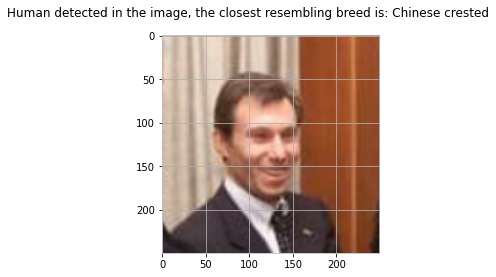

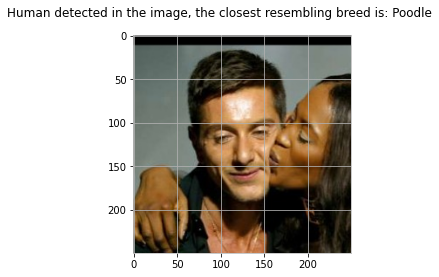

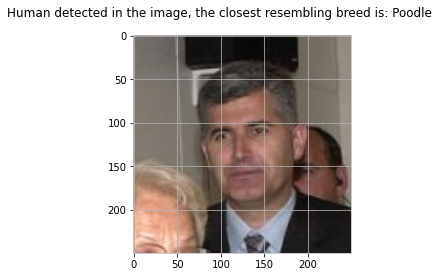

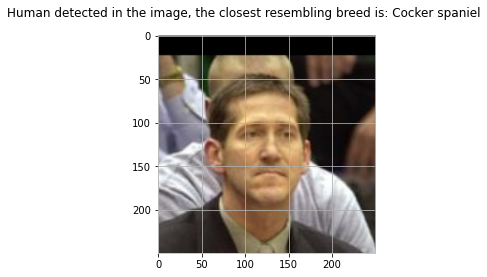

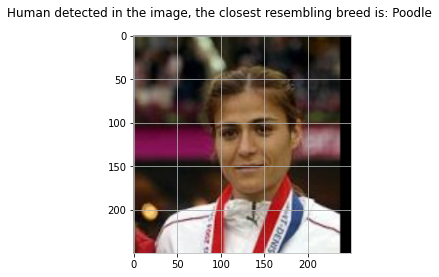

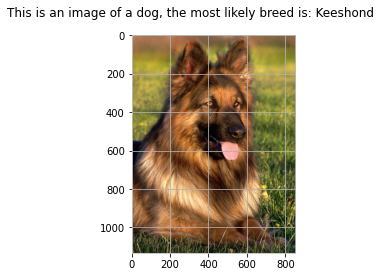

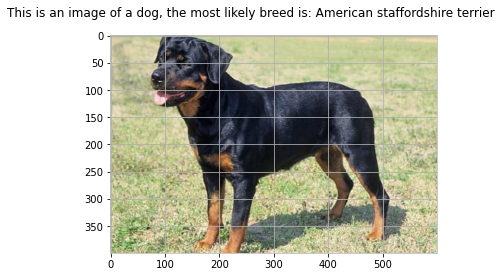

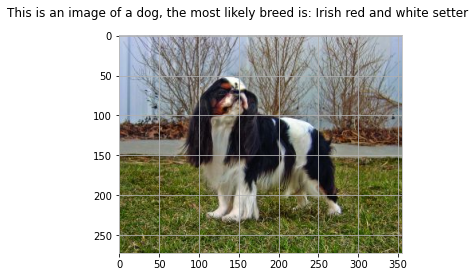

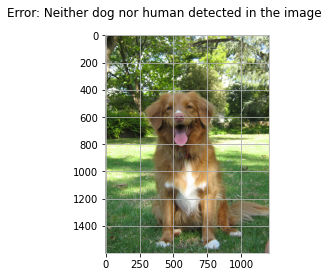

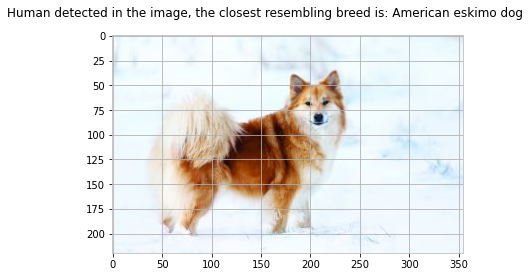

In [330]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# All these images were downloaded from 
new_dog_files = np.array(glob("sample_google_images/*"))

## suggested code, below
for file in np.hstack((human_files[:5], new_dog_files)):
    run_app(file)